# **20차시: 딥러닝 개념과 구성**
## 🔍 **학습목표**
- **딥러닝 모델의 기본 구조(Sequential, Dense, Activation)**를 이해한다.
- **입력 데이터의 형태와 문제 유형(회귀, 이진분류, 다중분류)**에 따라
모델 코드가 어떻게 달라지는지 파악한다.

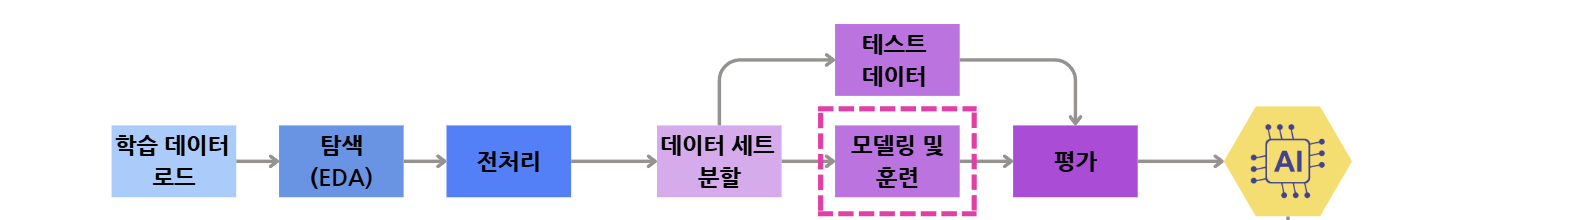


## **📌 딥러닝 모델의 구성과 학습 흐름**


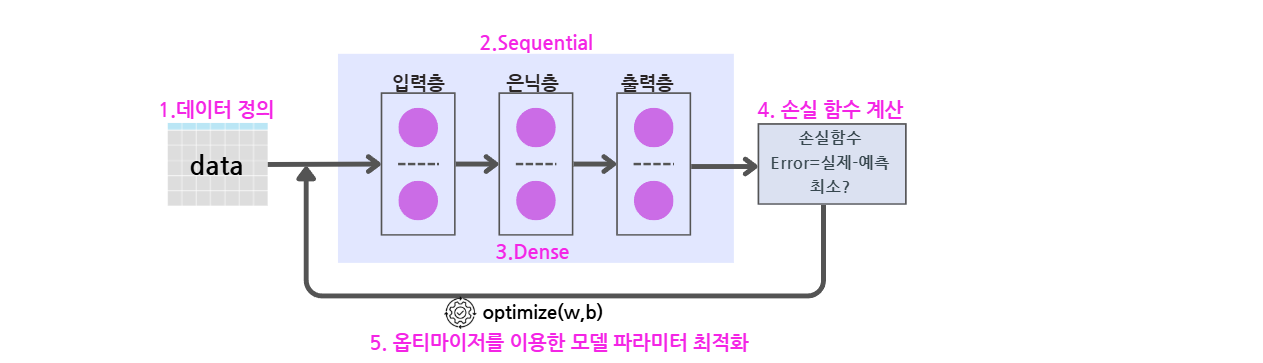

> **1. 데이터 분할**
>   - 데이터를 입력(Feature)과 정답(Label)으로 나눕니다.
>   - 그런 다음, 훈련용 데이터와 검증용 데이터로 나누어 모델에 넣습니다.

> **2. Sequential 모델 구조**
> - Sequential 모델은 층을 순서대로 쌓아 구성합니다.
> - 데이터가 **입력층 → 은닉층 → 출력층**으로 차례대로 흐르며 처리됩니다.
>

> **3. Dense층 구성**
> - **입력층 (input layer)**
>   - 입력값(Feature 개수만큼의 노드)을 받아들이는 층입니다.
> - **은닉층 (hidden layer)**
>   - 데이터를 학습하는 **중심 공간**입니다
>   - 뉴런 수와 활성화 함수는 문제에 따라 **자유롭게 설정**합니다.
> - **출력층 (output layer)**
>   - 최종 예측값을 출력하는 층입니다.
>   - **문제 유형(회귀/이진/다중분류)에 따라 뉴런 수와 활성화 함수가 달라집니다.**
>

## **✅코드로 보는 구조**


### **1.회귀**
- 출력층 **노드 수는 항상 1개**
  - → 예측 결과가 하나의 숫자이기 때문 (예: 집값, 연비 등)

- 활성화 함수는 **`linear`**
  - → 숫자를 그대로 출력해야 하므로 변형 없이 전달
  - → **Keras에서는 생략 가능** (기본값이 linear)

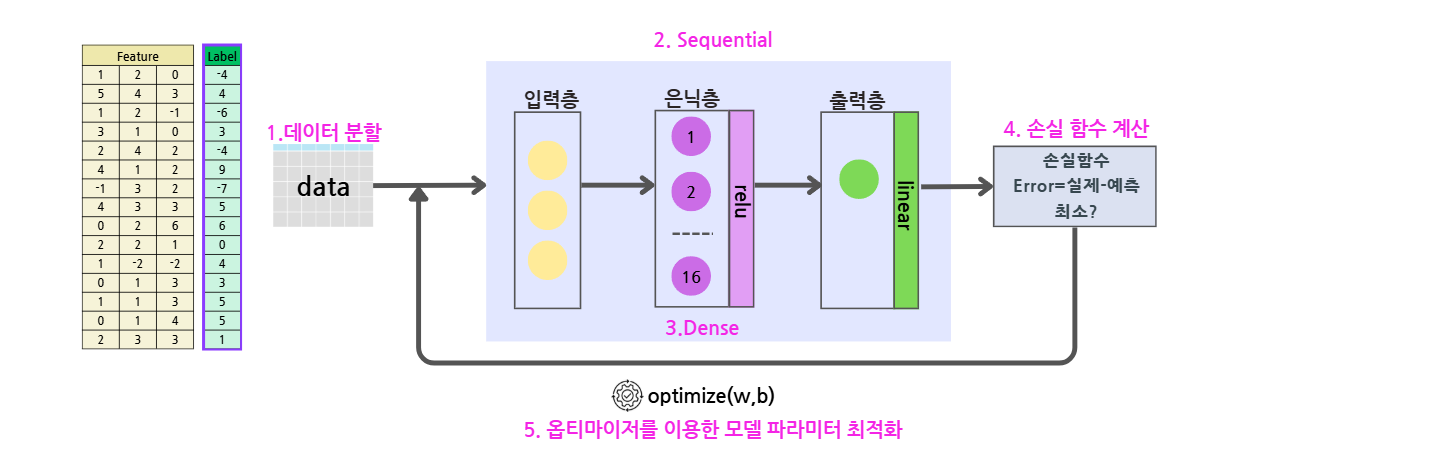

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
# 학습용 데이터 생성 (공부시간, 집중도 → 시험성적)
df = pd.DataFrame({
    'time': [8, 12, 14, 18, 21, 22, 17, 13, 15, 19],
    'focus': [0.5, 0.7, 0.6, 0.8, 0.9, 0.95, 0.85, 0.7, 0.75, 0.88],
    'score': [69, 82, 83, 91, 93, 98, 92, 87, 89, 94]
})


#feature, label 분리

X = df.drop('score',axis=1)
y = df['score']

#훈련/검증 데이터 분리
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(units=16, activation='relu', input_shape=[x_train.shape[1]]))
model.add(Dense(units=1, activation='linear'))  # 회귀용 출력층
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

### **2.이진 분류**
- 출력층 **노드 수는 항상 1개**
    - 예측 결과가 True/False 또는 0/1 중 하나이기 때문
    - → 확률로 해석할 수 있는 값 하나만 출력하면 됨

- 활성화 함수는 **`sigmoid`**
  - 0~1 사이의 값을 출력 → 확률처럼 해석 가능
  - 예: 출력이 0.85면, “1일 확률이 85%”라는 뜻

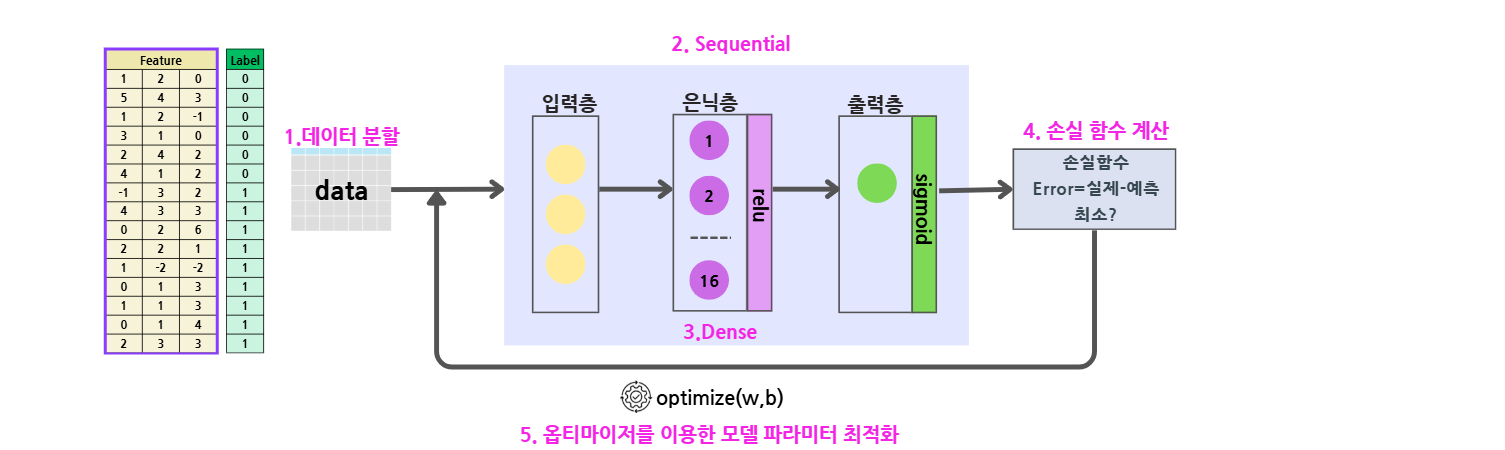

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 이진 분류용 데이터 생성 (공부시간, 집중도 → 합격 여부)
df = pd.DataFrame({
    'time': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'focus': [0.3, 0.4, 0.5, 0.6, 0.55, 0.65, 0.7, 0.8, 0.75, 0.85],
    'pass': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
})

# feature, label 분리
X = df.drop('pass', axis=1)
y = df['pass']

# 훈련/검증 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=[x_train.shape[1]]))
model.add(Dense(1, activation='sigmoid'))  # 이진 분류용 출력층

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

### **3.다중 분류**
- 출력층 **노드 수는 클래스 수만큼**
    - 각 클래스에 대한 확률을 출력하는 노드가 각각 필요함
    - 예: 클래스가 3개이면 출력 노드는 3개

- 활성화 함수는 **`softmax`**
  - 각 출력 노드의 값을 0~1 사이 확률로 변환
  - 모든 확률의 합은 1이 되도록 조정됨
  - 예: 출력이 [0.05, 0.10, 0.85]라면
  - → 3번째 클래스(2번)가 될 확률이 85%라는 뜻

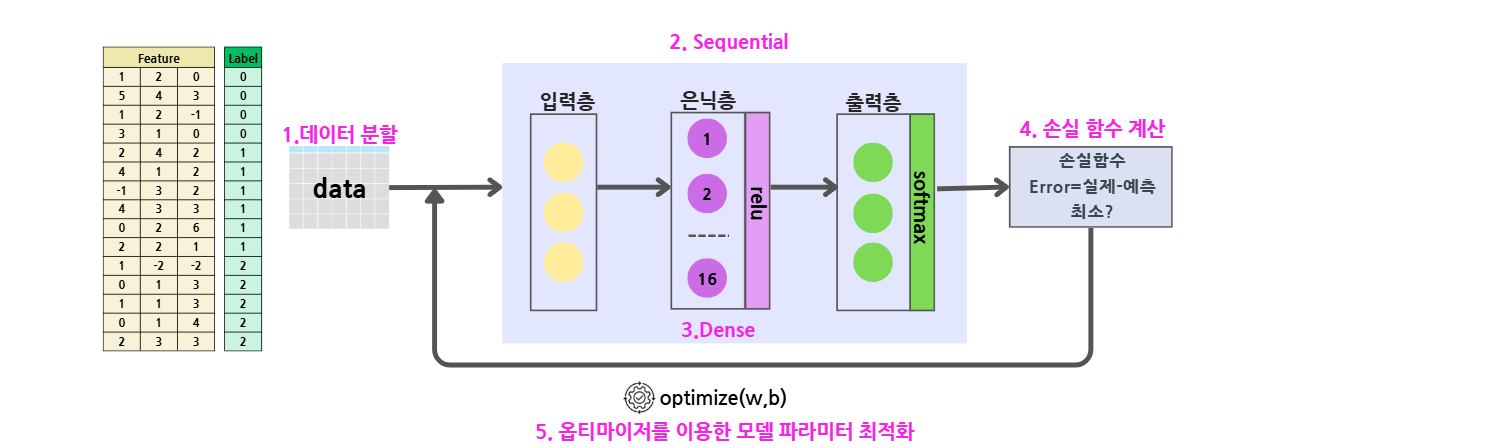

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 다중 분류용 데이터 생성: 공부 시간과 집중도에 따라 시험 결과를 '하(0)', '중(1)', '상(2)'으로 분류
df = pd.DataFrame({
    'time': [4, 6, 8, 9, 11, 12, 13, 14, 15, 16],
    'focus': [0.3, 0.4, 0.5, 0.55, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
    'grade': [0, 0, 0, 1, 1, 1, 1, 2, 2, 2]  # 0:하, 1:중, 2:상
})
# feature, label 분리
X = df.drop('grade', axis=1)
y = df['grade']

# 훈련/검증 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
#class 개수
y.value_counts()

,count
grade,
1,4
0,3
2,3


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 다중 분류 모델
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=[x_train.shape[1]]))
model.add(Dense(3, activation='softmax'))  # 클래스 수만큼 노드
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99 (396.00 B)

 Trainable params: 99 (396.00 B)

 Non-trainable params: 0 (0.00 B)

---

## 📷 **레이어(Layer) & 노드수(뉴런 수)의 효과**


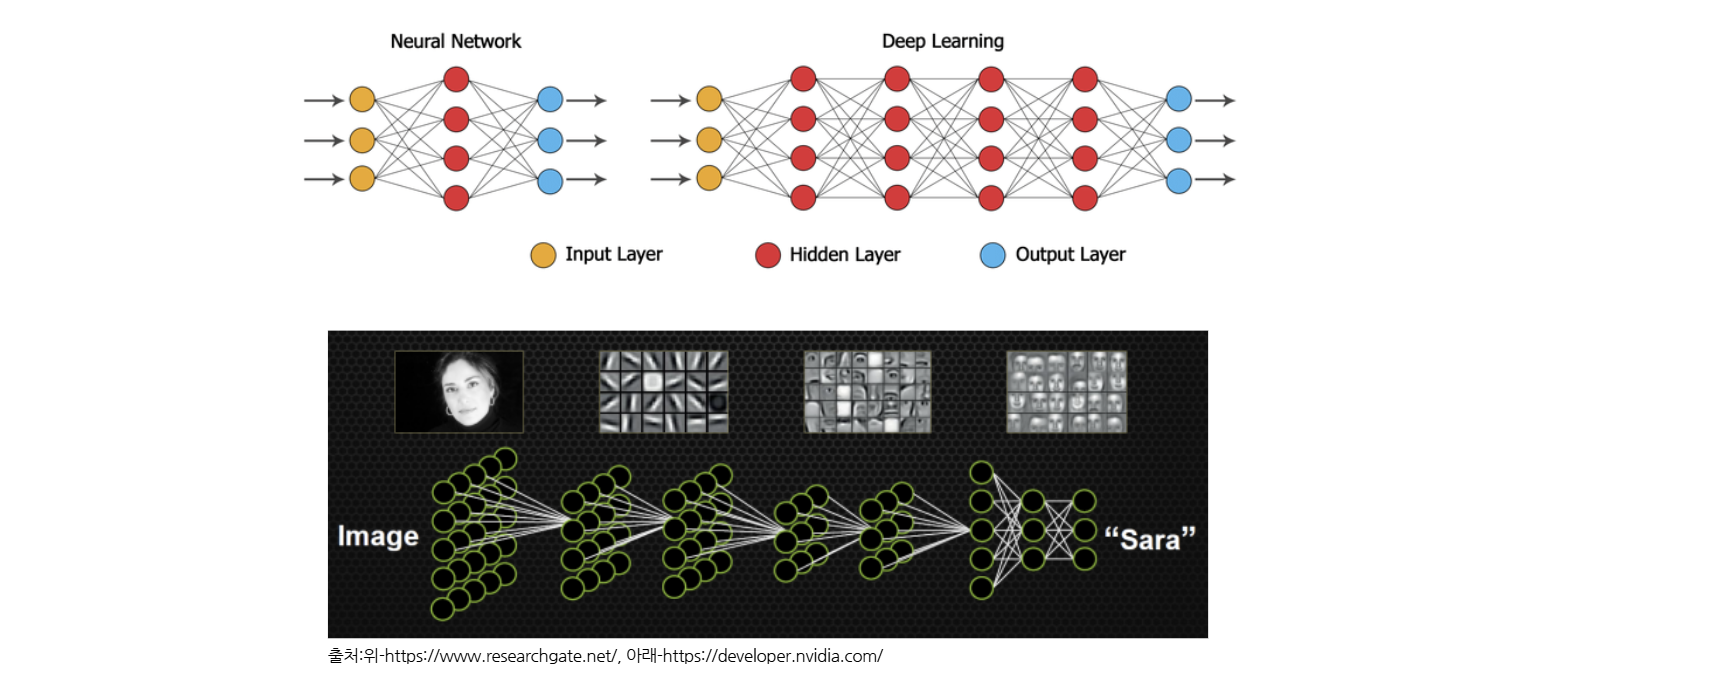

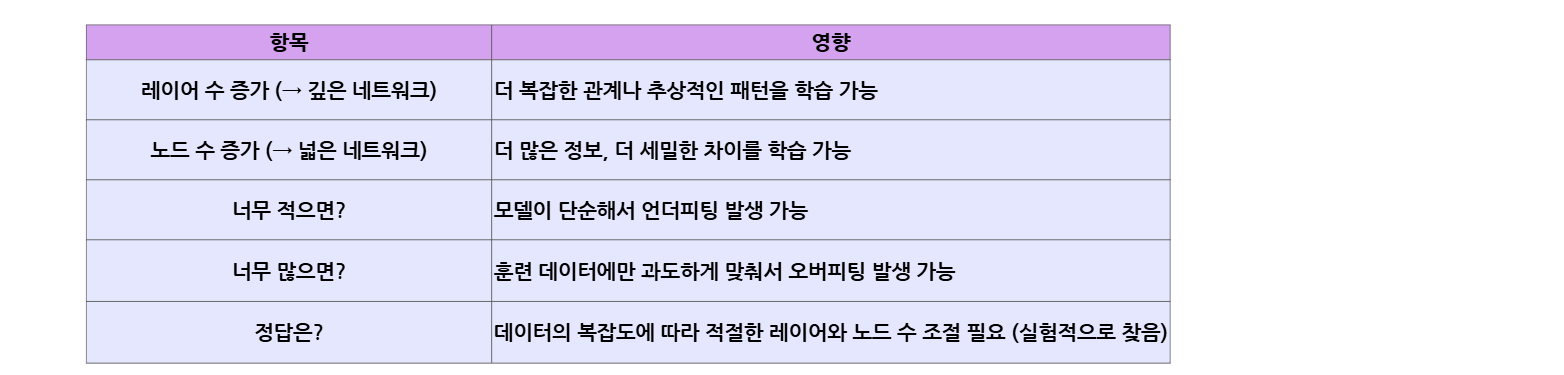

### **레이어와 노드 구성 코드**

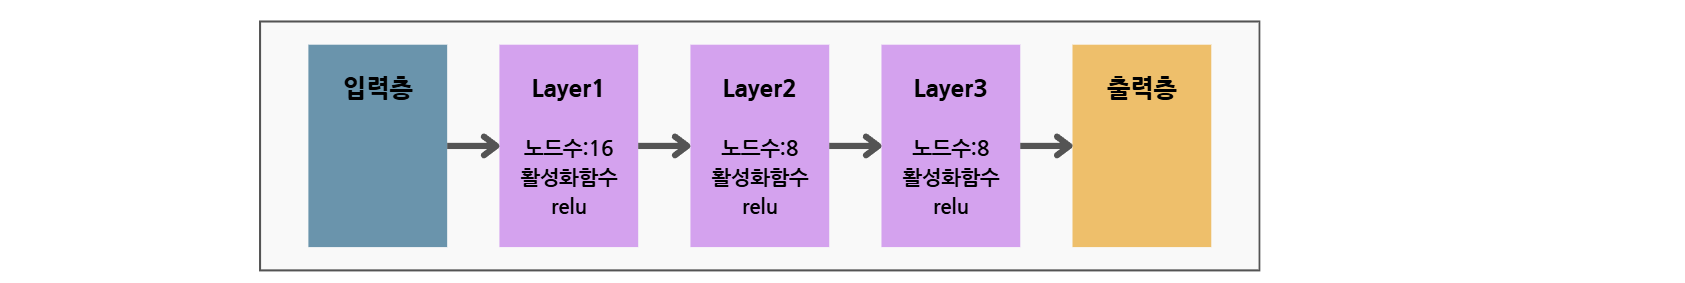

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 다중 분류 모델
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=[x_train.shape[1]]))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 클래스 수만큼 노드
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283 (1.11 KB)

 Trainable params: 283 (1.11 KB)

 Non-trainable params: 0 (0.00 B)

---

## **연습 문제**

### **온라인 교육 플랫폼 회원 이탈 예측 모델**

**[데이터 설명: online_edu_churn.csv]**
- age: 사용자 나이 (일부 결측값 있음)
- salary: 사용자의 연간 추정 소득 (단위: 원)
- experience_years: 해당 분야 또는 업무 경력 (년 단위)
- weekly_study_hours: 주당 평균 학습 시간 (시간)
- courses_completed: 수강 완료한 강의 수
- login_days_past30: 최근 30일 간 로그인한 총 일수
- membership: 회원 등급 (예: basic, premium 등)
- device: 주 사용 기기 (예: desktop, mobile, tablet)
- region: 거주 지역 (예: 서울특별시, 경기도 등)
- promo_opt_in: 마케팅 수신 동의 여부 (1: 동의, 0: 비동의)
- num_promo_emails_last3m: 최근 3개월간 받은 프로모션 이메일 수
- **churn: 이탈 여부 (1: 이탈, 0: 유지) → Target**

### **문제 1. 아래의 지시대로 코드를 실행하고, 문제 유형을 변수`답안01`에 저장하시오.**

- `online_edu_churn.csv` 파일을 읽고 데이터프레임 변수 `df`에 저장하시오.
- 결측치는 삭제
- 오브젝트 타입 컬럼에 대해서는 수치형으로 변환
- 답안01='회귀' 또는 답안01='이진분류' 또는 답안01='다중분류'


In [ ]:
# 코드를 실행하시오.

import pandas as pd

df = pd.read_csv('online_edu_churn.csv')
df = df.dropna()
df = pd.get_dummies(df,drop_first=True,dtype=int)

답안01=''

In [ ]:
# 여기에 코드를 작성하세요.
답안01='이진분류'

In [ ]:
df['churn'].value_counts()

,count
churn,
0,2089
1,1816


### **문제 2.  변수 X,y 데이터로 분리 후, 학습/검증 데이터로 분할하는 코드를 실행하고, 훈련용 데이터의 feature 수를 `답안02`에 저장하시오.**
- `df` 사용
- 타겟 변수: churn
- 설명 변수: 나머지 전체 컬럼:

- 훈련:검증 = 8:2
- random_state = 42
- train_test_split 사용
- 결과는 다음 변수에 저장할 것:X_train, X_test, y_train, y_test

- `답안02`에 훈련용 데이터의 feature수 저장(예: 답안02=10)

In [ ]:
# 여기에 코드를 작성하세요.
from sklearn.model_selection import train_test_split

X = df.drop('', axis=1)
y = df['']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
답안02=''

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
답안02=X_train.shape[1]
답안02

19

### **문제 3. 다음 조건으로 모델을 학습하시오.**
- Tensorflow framework를 사용하여 딥러닝 모델을 만드세요.
- 아래와 같은 아키텍쳐로 히든 레이어를 구성하시오.
- 입력층은 입력 데이터의 컬럼수를 지정하시오.
- 출력층은 문제 유형에 맞는 노드수와 활성화 함수를 지정하시오.

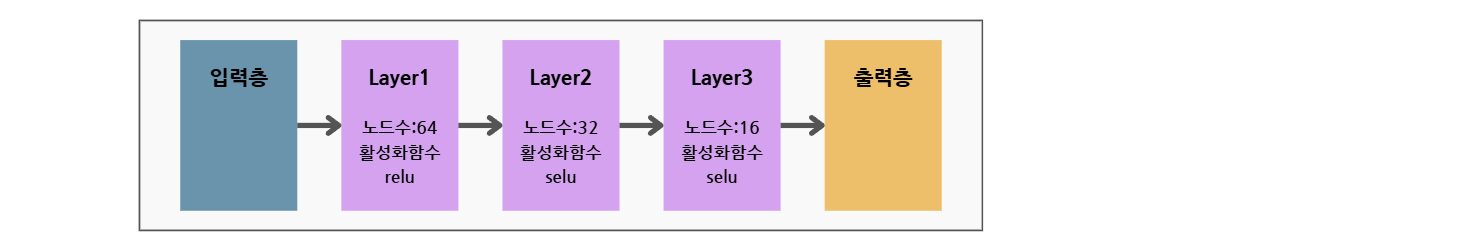

In [ ]:
# 여기에 코드를 작성하세요.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 다중 분류 모델
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=[X_train.shape[1]]))
model.add(Dense(32, activation='selu'))
model.add(Dense(16, activation='selu'))
model.add(Dense(1, activation='sigmoid'))  # 클래스 수만큼 노드
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)